In [1]:
import psycopg2 as pg
import pandas.io.sql as psql
import pandas

In [2]:
connection = pg.connect(dbname='finan', user='postgres', 
                        password='postgres', host='database')

In [3]:
cursor = connection.cursor()

# for i in range(1,8):
#     cursor.execute("ALTER TABLE investorplace  ADD COLUMN local_{}_hour  float;".format(i))
# connection.commit()


In [12]:
data = pandas.read_csv('/home/jovyan/csv_tables/SPX.csv')
data.company[data.company != 'SPX']

Series([], Name: company, dtype: object)

In [105]:
cursor.execute("DELETE FROM barrons")

In [107]:
connection.commit()

In [9]:
name = "detkishop"
dataframe = psql.read_sql("""SELECT * FROM {} ORDER BY price;
                             """.format(name), connection)
dataframe.to_excel("{}.xlsx".format(name))
dataframe

,name,price
0,Коляска для куклы WJ-13695,1199.0
1,Коляска для куклы WJ-13861,1399.0
2,Коляска для куклы WJ-13865,1499.0
3,Коляска-трость Zlatek Micra зеленая,1590.0
4,Коляска-трость Zlatek Micra голубая,1590.0
...,...,...
921,Коляска прогулочная Inglesina Quid с чехлом на...,NaN
922,Коляска прогулочная Inglesina Quid с чехлом на...,NaN
923,Коляска прогулочная Inglesina Quid с чехлом на...,NaN
924,Коляска прогулочная Inglesina Quid с чехлом на...,NaN


In [12]:
!pip3 install openpyxl

     |████████████████████████████████| 242 kB 2.9 MB/s            


In [98]:
dataframe.company.unique()

array(['NIO'], dtype=object)

In [73]:
# columns = "company, news_portal, title, date, link, brief, author, text"
# psql.execute("""
# UPDATE yahoo SET company='SPX'
# WHERE company!='NIO' and company is not NULL;
# """, connection)
# psql.execute("""
# UPDATE investorplace SET company='SPX'
# WHERE company!='NIO' and company is not NULL;
# """, connection)
# psql.execute("""
# UPDATE barrons SET company='SPX'
# WHERE company!='NIO' and company is not NULL;
# """, connection)
# psql.execute("""
# UPDATE fool SET company='SPX'
# WHERE company!='NIO' and company is not NULL;
# """, connection)
# psql.execute("""
# UPDATE market_watch SET company='SPX'
# WHERE company!='NIO' and company is not NULL;
# """, connection)
# dataframe = psql.read_sql("""SELECT * FROM(SELECT {0} FROM investorplace 
#                              UNION 
#                              SELECT {0} FROM yahoo
#                              UNION
#                              SELECT {0} FROM barrons
#                              UNION
#                              SELECT {0} FROM fool
#                              UNION
#                              SELECT {0} FROM market_watch) AS joined  
#                              WHERE joined.company='SPX';
#                              """.format(columns), connection)

In [75]:
dataframe.to_csv('/yahoo/tables/SPX.csv')

In [208]:
connection.close()

[*********************100%***********************]  1 of 1 completed


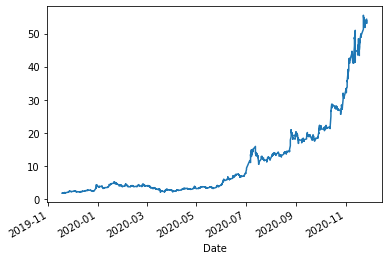

In [60]:
import yfinance as yf


# Get the data for the stock AAPL
data = yf.download('NIO','2019-11-18',period='5d', interval="1h")

# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

In [61]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-18,1.880000,1.900000,1.780000,1.795000,1.795000,11304262
2019-11-18,1.795000,1.819100,1.730000,1.775000,1.775000,5622818
2019-11-18,1.770000,1.790000,1.750000,1.775000,1.775000,2195737
2019-11-18,1.775000,1.790000,1.760000,1.780000,1.780000,2558483
2019-11-18,1.785000,1.790000,1.770000,1.775000,1.775000,853224
...,...,...,...,...,...,...
2020-11-25,53.930000,53.959999,53.299999,53.689999,53.689999,10518592
2020-11-27,54.860001,55.549999,52.930000,54.349998,54.349998,48085650
2020-11-27,54.360001,54.560001,53.009998,53.066200,53.066200,21799012


In [248]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np

global_stocks = []

days = []
days_amount = 30
for day in range(1,days_amount+1):
    days.append("global_{}_day".format(day))

hours = []
hours_amount = 7
for hour in range(1,hours_amount+1):
    hours.append("local_{}_hour".format(hour))

               
for paper_index in range(7):
    paper = dataframe.loc[paper_index]
    
    start_date = paper['date'].date()-relativedelta(months=2)
    end_date = paper['date'].date()
    
    stocks = yf.download('NIO',start_date,end_date)
    stocks_close = stocks['Adj Close'][-days_amount:].values
    stocks_open = stocks['Open'][-days_amount:].values
    stocks = stocks_close/stocks_open-1
    stocks = list([None]*(days_amount-len(stocks)))+list(stocks)
    stocks = list(map(lambda x: str(x) if x!=None and not np.isnan(x) else "null", stocks))
    
    
    setter = ["{}={}".format(day,stock) for day,stock in zip(days,stocks)]

    start_date = paper['date'].date()-relativedelta(days=2)
    end_date = paper['date'].date()
    
    stocks = yf.download('NIO',start_date,end_date, interval='1h')
    stocks_close = stocks['Adj Close'][-hours_amount:].values
    stocks_open = stocks['Open'][-hours_amount:].values
    stocks = stocks_close/stocks_open-1
    stocks = list([None]*(days_amount-len(stocks)))+list(stocks)
    stocks = list(map(lambda x: str(x) if x!=None and not np.isnan(x) else "null", stocks))
    
    setter += ["{}={}".format(hour,stock) for hour,stock in zip(hours,stocks)]
    
    insert = "UPDATE investorplace SET {} WHERE date='{}'".format(",".join(setter), str(paper['date']))
    print(insert)
    cursor.execute(insert)
connection.commit()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NIO: 1h data not available for startTime=1536969600 and endTime=1537142400. The requested range must be within the last 730 days.
UPDATE investorplace SET global_1_day=null,global_2_day=null,global_3_day=null,global_4_day=null,global_5_day=null,global_6_day=null,global_7_day=null,global_8_day=null,global_9_day=null,global_10_day=null,global_11_day=null,global_12_day=null,global_13_day=null,global_14_day=null,global_15_day=null,global_16_day=null,global_17_day=null,global_18_day=null,global_19_day=null,global_20_day=null,global_21_day=null,global_22_day=null,global_23_day=null,global_24_day=null,global_25_day=null,global_26_day=null,global_27_day=null,global_28_day=0.09999998410542799,global_29_day=0.7522659489426964,global_30_day=-0.21800949937973502,local_1_hour=null,local_2_hour=null,local_3_hour=null,local_4_hour=null,local_5

In [73]:
dataframe.loc[0]['date'].date()

datetime.date(2018, 9, 17)

In [84]:
[1,2,3,4,5][-2:]

[4, 5]

In [111]:
("{} "*30).format(*([None]*(30-len(global_stocks[4]))), *global_stocks[0])

IndexError: Replacement index 8 out of range for positional args tuple

In [115]:
"{}".format(*[None]*0,1)

'1'

In [207]:
np.isnan(stocks[-3])

True

In [232]:
stocks

['-0.0595534083028586',
 '-0.01185772737530233',
 '-0.07152317194848545',
 '0.001434753110883591',
 '-0.06515581329677311',
 '-0.10151516454169485',
 '0.029411815121192175',
 '0.00969304397817461',
 '0.009677487332666601',
 '-0.004942373799000865',
 '0.19386103363042317',
 '-0.04320992160326542',
 '-0.034946267054058455',
 'null',
 '-0.005089053584423131',
 '-0.0024814462434759044',
 '-0.04310343713859177',
 '-0.013157882353605488',
 '-0.03557311930151341',
 '-0.08463536888787726',
 '0.010385782498292917',
 '-0.0992700493147084',
 '0.02870810668041246',
 '0.022544261775458985',
 '-0.05206740301128865',
 '-0.04032258188563265',
 '-0.02960523529561243',
 '0.10333331425984693',
 '-0.05116964527220147',
 '0.024539853969351322']

In [233]:
stocks_close

array([7.57999992, 7.5       , 7.01000023, 6.98000002, 6.5999999 ,
       5.92999983, 6.30000019, 6.25      , 6.26000023, 6.03999996,
       7.38999987, 7.75      , 7.17999983, 7.46000004, 7.82000017,
       8.03999996, 7.76999998, 7.5       , 7.32000017, 7.03000021,
       6.80999994, 6.17000008, 6.44999981, 6.3499999 , 6.19000006,
       5.94999981, 5.9000001 , 6.61999989, 6.48999977, 6.67999983])

In [234]:
stocks_open

array([8.06000042, 7.59000015, 7.55000019, 6.96999979, 7.05999994,
       6.5999999 , 6.11999989, 6.19000006, 6.19999981, 6.07000017,
       6.19000006, 8.10000038, 7.44000006, 7.46000004, 7.86000013,
       8.06000042, 8.11999989, 7.5999999 , 7.59000015, 7.67999983,
       6.73999977, 6.8499999 , 6.26999998, 6.21000004, 6.53000021,
       6.19999981, 6.07999992, 6.        , 6.84000015, 6.51999998])

In [237]:
stocks_close/stocks_open-1

array([-0.05955341, -0.01185773, -0.07152317,  0.00143475, -0.06515581,
       -0.10151516,  0.02941182,  0.00969304,  0.00967749, -0.00494237,
        0.19386103, -0.04320992, -0.03494627,  0.        , -0.00508905,
       -0.00248145, -0.04310344, -0.01315788, -0.03557312, -0.08463537,
        0.01038578, -0.09927005,  0.02870811,  0.02254426, -0.0520674 ,
       -0.04032258, -0.02960524,  0.10333331, -0.05116965,  0.02453985])

In [236]:
-1

-1

In [239]:
None!=None

False

In [251]:
stocks

['null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null',
 'null']

In [252]:
stocks = yf.download('NIO',start_date,end_date, interval='1h')
stocks_close = stocks['Adj Close'][-hours_amount:].values
stocks_open = stocks['Open'][-hours_amount:].values

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- NIO: 1h data not available for startTime=1541289600 and endTime=1541462400. The requested range must be within the last 730 days.
